In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import pytorch_tabnet
import pickle
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.augmentations import ClassificationSMOTE

from sklearn.preprocessing import LabelEncoder

from Utility import *

from matplotlib import pyplot as plt

### Define optimizers

In [2]:
sgd = torch.optim.SGD
adam = torch.optim.Adam

# SGD

### SGD; N = 50, p = 6, d = 4

In [3]:
data, info = get_files(50, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sgd_50_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.68669 | train_auc: 0.74675 | valid_auc: 0.66667 |  0:00:00s
epoch 1  | loss: 0.73431 | train_auc: 0.77056 | valid_auc: 0.66667 |  0:00:00s
epoch 2  | loss: 0.75924 | train_auc: 0.77706 | valid_auc: 0.66667 |  0:00:00s
epoch 3  | loss: 0.62425 | train_auc: 0.75325 | valid_auc: 1.0     |  0:00:00s
epoch 4  | loss: 0.7064  | train_auc: 0.76623 | valid_auc: 1.0     |  0:00:00s
epoch 5  | loss: 0.78604 | train_auc: 0.77273 | valid_auc: 0.66667 |  0:00:00s
epoch 6  | loss: 0.8631  | train_auc: 0.7684  | valid_auc: 0.66667 |  0:00:01s
epoch 7  | loss: 0.80551 | train_auc: 0.76623 | valid_auc: 0.66667 |  0:00:01s
epoch 8  | loss: 0.5551  | train_auc: 0.7619  | valid_auc: 0.66667 |  0:00:01s
epoch 9  | loss: 0.76956 | train_auc: 0.75541 | valid_auc: 0.66667 |  0:00:01s
epoch 10 | loss: 0.6253  | train_auc: 0.75108 | valid_auc: 0.66667 |  0:00:01s
epoch 11 | loss: 0.82779 | train_auc: 0.74026 | valid_auc: 0.33333 |  0:00:01s
epoch 12 | loss: 0.68943 | train_auc: 0.74459 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.12634535202038186
Average irrelevant feature importance: 0.1376770572118915
Average random feature importance: 0.08640245737876788
Train AUC score: 0.7532467532467533
Validation AUC score: 1.0
Test AUC score: 0.0
False negative rate for relevant features: 0.3333333333333333
False positive rate for irrelevant features: 1.0
False positive rate for random features: 0.0


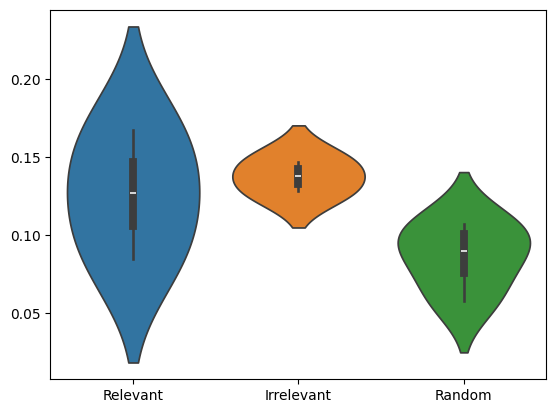

In [4]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sgd_50_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sgd_50_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

### SGD; N = 50, p = 60, d = 40

In [5]:
data, info = get_files(50, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sgd_50_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.96744 | train_auc: 0.22917 | valid_auc: 0.2     |  0:00:00s
epoch 1  | loss: 1.06942 | train_auc: 0.29167 | valid_auc: 0.8     |  0:00:00s
epoch 2  | loss: 0.88565 | train_auc: 0.47222 | valid_auc: 0.0     |  0:00:00s
epoch 3  | loss: 1.02373 | train_auc: 0.54861 | valid_auc: 0.0     |  0:00:00s
epoch 4  | loss: 0.87761 | train_auc: 0.45139 | valid_auc: 0.0     |  0:00:00s
epoch 5  | loss: 1.07468 | train_auc: 0.47222 | valid_auc: 0.0     |  0:00:01s
epoch 6  | loss: 0.96766 | train_auc: 0.48611 | valid_auc: 0.0     |  0:00:01s
epoch 7  | loss: 1.15527 | train_auc: 0.47917 | valid_auc: 0.0     |  0:00:01s
epoch 8  | loss: 0.85835 | train_auc: 0.5     | valid_auc: 0.0     |  0:00:01s
epoch 9  | loss: 1.02368 | train_auc: 0.51389 | valid_auc: 0.0     |  0:00:01s
epoch 10 | loss: 1.02408 | train_auc: 0.48611 | valid_auc: 0.0     |  0:00:01s
epoch 11 | loss: 1.02065 | train_auc: 0.44444 | valid_auc: 0.0     |  0:00:02s
epoch 12 | loss: 1.02262 | train_auc: 0.4375  | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.009980202553599507
Average irrelevant feature importance: 0.00905498036302825
Average random feature importance: 0.011389467862126235
Train AUC score: 0.5208333333333334
Validation AUC score: 1.0
Test AUC score: 0.0
False negative rate for relevant features: 0.5454545454545454
False positive rate for irrelevant features: 0.4166666666666667
False positive rate for random features: 0.6


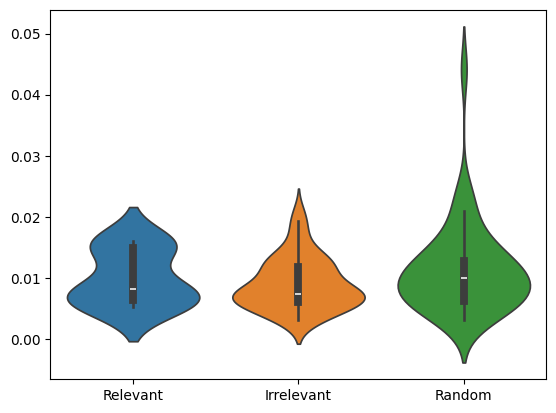

In [6]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sgd_50_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sgd_50_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

### SGD; N = 50, p = 600, d = 400

In [7]:
data, info = get_files(50, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sgd_50_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.50919 | train_auc: 0.39489 | valid_auc: 0.625   |  0:00:00s
epoch 1  | loss: 1.99571 | train_auc: 0.39489 | valid_auc: 0.375   |  0:00:01s
epoch 2  | loss: 1.27459 | train_auc: 0.38352 | valid_auc: 0.625   |  0:00:02s
epoch 3  | loss: 1.51343 | train_auc: 0.33523 | valid_auc: 0.75    |  0:00:02s
epoch 4  | loss: 1.94837 | train_auc: 0.31534 | valid_auc: 0.875   |  0:00:03s
epoch 5  | loss: 1.43923 | train_auc: 0.34943 | valid_auc: 0.75    |  0:00:04s
epoch 6  | loss: 2.11211 | train_auc: 0.38068 | valid_auc: 0.75    |  0:00:05s
epoch 7  | loss: 1.53922 | train_auc: 0.38352 | valid_auc: 0.75    |  0:00:05s
epoch 8  | loss: 1.23149 | train_auc: 0.4517  | valid_auc: 0.625   |  0:00:06s
epoch 9  | loss: 1.72194 | train_auc: 0.47727 | valid_auc: 0.625   |  0:00:07s
epoch 10 | loss: 2.38671 | train_auc: 0.52841 | valid_auc: 0.5     |  0:00:07s
epoch 11 | loss: 0.91728 | train_auc: 0.54261 | valid_auc: 0.625   |  0:00:08s
epoch 12 | loss: 2.03163 | train_auc: 0.55398 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.0009557223410069195
Average irrelevant feature importance: 0.0010746781951318936
Average random feature importance: 0.0009132710150737345
Train AUC score: 0.5823863636363635
Validation AUC score: 1.0
Test AUC score: 0.625
False negative rate for relevant features: 0.5657894736842105
False positive rate for irrelevant features: 0.5258126195028681
False positive rate for random features: 0.4775


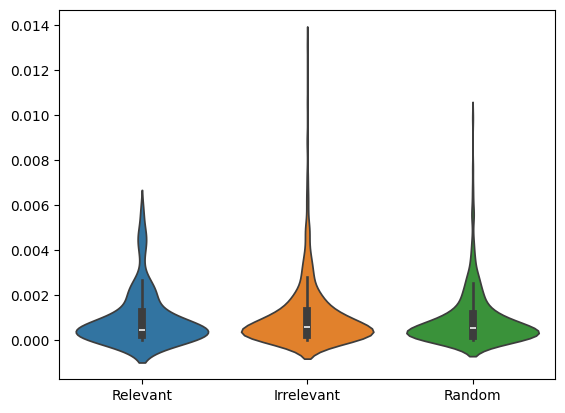

In [8]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sgd_50_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sgd_50_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

### SGD; N = 500, p = 60, d = 40

In [9]:
data, info = get_files(500, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sgd_500_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.8363  | train_auc: 0.58665 | valid_auc: 0.57358 |  0:00:00s
epoch 1  | loss: 0.85239 | train_auc: 0.56144 | valid_auc: 0.60702 |  0:00:01s
epoch 2  | loss: 0.8973  | train_auc: 0.52271 | valid_auc: 0.59699 |  0:00:02s
epoch 3  | loss: 0.8462  | train_auc: 0.52242 | valid_auc: 0.70569 |  0:00:03s
epoch 4  | loss: 0.78638 | train_auc: 0.5208  | valid_auc: 0.61538 |  0:00:04s
epoch 5  | loss: 0.79231 | train_auc: 0.53745 | valid_auc: 0.6505  |  0:00:05s
epoch 6  | loss: 0.83324 | train_auc: 0.55374 | valid_auc: 0.65385 |  0:00:06s
epoch 7  | loss: 0.85584 | train_auc: 0.55832 | valid_auc: 0.64381 |  0:00:06s
epoch 8  | loss: 0.87385 | train_auc: 0.5493  | valid_auc: 0.58361 |  0:00:07s
epoch 9  | loss: 0.88443 | train_auc: 0.56206 | valid_auc: 0.51338 |  0:00:08s
epoch 10 | loss: 0.88599 | train_auc: 0.56523 | valid_auc: 0.54181 |  0:00:09s
epoch 11 | loss: 0.82423 | train_auc: 0.5834  | valid_auc: 0.56355 |  0:00:10s
epoch 12 | loss: 0.86596 | train_auc: 0.5701  | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.009868537348797791
Average irrelevant feature importance: 0.011725918822682294
Average random feature importance: 0.008447222326097417
Train AUC score: 0.5224226804123712
Validation AUC score: 0.705685618729097
Test AUC score: 0.5098522167487685
False negative rate for relevant features: 0.4375
False positive rate for irrelevant features: 0.5581395348837209
False positive rate for random features: 0.4


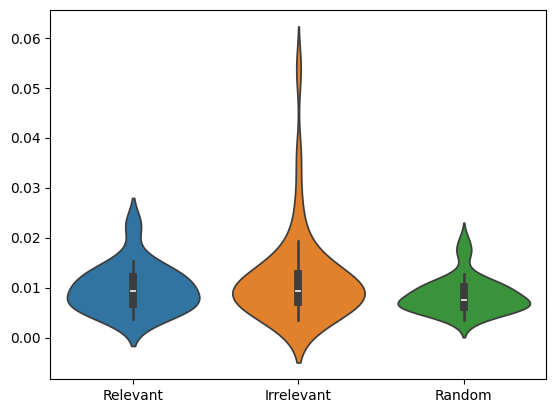

In [10]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sgd_500_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sgd_500_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

### SGD; N = 500, p = 600, d = 400

In [11]:
data, info = get_files(500, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sgd_500_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.79795 | train_auc: 0.44093 | valid_auc: 0.39    |  0:00:01s
epoch 1  | loss: 0.84088 | train_auc: 0.42832 | valid_auc: 0.40333 |  0:00:03s
epoch 2  | loss: 0.87539 | train_auc: 0.42256 | valid_auc: 0.33333 |  0:00:05s
epoch 3  | loss: 0.85758 | train_auc: 0.44772 | valid_auc: 0.31833 |  0:00:07s
epoch 4  | loss: 0.80697 | train_auc: 0.4514  | valid_auc: 0.435   |  0:00:09s
epoch 5  | loss: 0.8105  | train_auc: 0.46789 | valid_auc: 0.46833 |  0:00:11s
epoch 6  | loss: 0.87943 | train_auc: 0.44514 | valid_auc: 0.58167 |  0:00:13s
epoch 7  | loss: 0.8211  | train_auc: 0.42421 | valid_auc: 0.52    |  0:00:14s
epoch 8  | loss: 0.86651 | train_auc: 0.47233 | valid_auc: 0.40833 |  0:00:16s
epoch 9  | loss: 0.83909 | train_auc: 0.45068 | valid_auc: 0.46333 |  0:00:18s
epoch 10 | loss: 0.86799 | train_auc: 0.44173 | valid_auc: 0.48167 |  0:00:20s
epoch 11 | loss: 0.88372 | train_auc: 0.43484 | valid_auc: 0.44333 |  0:00:22s
epoch 12 | loss: 0.83842 | train_auc: 0.4502  | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.0009983214004342946
Average irrelevant feature importance: 0.0010159886333120855
Average random feature importance: 0.000981339610793404
Train AUC score: 0.5470175438596492
Validation AUC score: 0.7050000000000001
Test AUC score: 0.5740131578947368
False negative rate for relevant features: 0.5079365079365079
False positive rate for irrelevant features: 0.5111940298507462
False positive rate for random features: 0.485


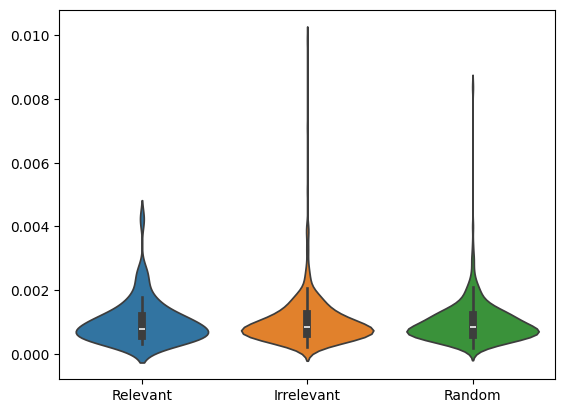

In [12]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sgd_500_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sgd_500_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

### SGD; N = 5000, p = 6, d = 4

In [13]:
data, info = get_files(5000, 6, 4)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sgd_5000_6_4 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.84492 | train_auc: 0.39807 | valid_auc: 0.37225 |  0:00:07s
epoch 1  | loss: 0.77282 | train_auc: 0.55331 | valid_auc: 0.51181 |  0:00:14s
epoch 2  | loss: 0.72768 | train_auc: 0.65884 | valid_auc: 0.60676 |  0:00:21s
epoch 3  | loss: 0.69274 | train_auc: 0.71042 | valid_auc: 0.66582 |  0:00:29s
epoch 4  | loss: 0.66725 | train_auc: 0.74157 | valid_auc: 0.72268 |  0:00:36s
epoch 5  | loss: 0.6474  | train_auc: 0.76204 | valid_auc: 0.74555 |  0:00:44s
epoch 6  | loss: 0.62506 | train_auc: 0.78405 | valid_auc: 0.76275 |  0:00:51s
epoch 7  | loss: 0.61354 | train_auc: 0.80907 | valid_auc: 0.79207 |  0:00:58s
epoch 8  | loss: 0.60079 | train_auc: 0.81738 | valid_auc: 0.80272 |  0:01:06s
epoch 9  | loss: 0.59085 | train_auc: 0.82996 | valid_auc: 0.80998 |  0:01:13s
epoch 10 | loss: 0.59094 | train_auc: 0.84634 | valid_auc: 0.82646 |  0:01:20s
epoch 11 | loss: 0.57548 | train_auc: 0.84873 | valid_auc: 0.82753 |  0:01:28s
epoch 12 | loss: 0.56995 | train_auc: 0.86362 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.1553053521792511
Average irrelevant feature importance: 0.22849117812888245
Average random feature importance: 0.019275396801120476
Train AUC score: 0.9655838468849125
Validation AUC score: 0.9672338910644358
Test AUC score: 0.9622519413287316
False negative rate for relevant features: 0.0
False positive rate for irrelevant features: 1.0
False positive rate for random features: 0.0


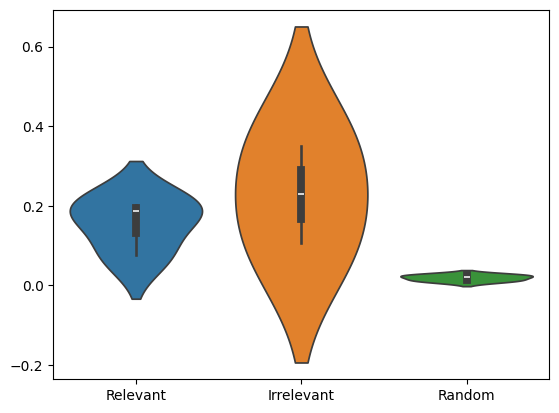

In [14]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sgd_5000_6_4, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sgd_5000_6_4, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

### SGD; N = 5000, p = 60, d = 40

In [15]:
data, info = get_files(5000, 60, 40)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sgd_5000_60_40 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.07152 | train_auc: 0.5278  | valid_auc: 0.41844 |  0:00:08s
epoch 1  | loss: 1.09868 | train_auc: 0.55683 | valid_auc: 0.51709 |  0:00:16s
epoch 2  | loss: 0.99178 | train_auc: 0.50663 | valid_auc: 0.62153 |  0:00:24s
epoch 3  | loss: 0.97766 | train_auc: 0.52466 | valid_auc: 0.66602 |  0:00:33s
epoch 4  | loss: 0.96169 | train_auc: 0.56471 | valid_auc: 0.47324 |  0:00:41s
epoch 5  | loss: 0.9196  | train_auc: 0.5126  | valid_auc: 0.57124 |  0:00:49s
epoch 6  | loss: 0.91096 | train_auc: 0.53345 | valid_auc: 0.59574 |  0:00:58s
epoch 7  | loss: 0.89295 | train_auc: 0.52926 | valid_auc: 0.46357 |  0:01:06s
epoch 8  | loss: 0.85677 | train_auc: 0.53005 | valid_auc: 0.53836 |  0:01:15s
epoch 9  | loss: 0.8478  | train_auc: 0.50413 | valid_auc: 0.56609 |  0:01:23s
epoch 10 | loss: 0.82479 | train_auc: 0.49668 | valid_auc: 0.5764  |  0:01:32s
epoch 11 | loss: 0.80303 | train_auc: 0.56141 | valid_auc: 0.52353 |  0:01:40s
epoch 12 | loss: 0.79894 | train_auc: 0.56494 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.010561889188782148
Average irrelevant feature importance: 0.010812926002597789
Average random feature importance: 0.009283143198947729
Train AUC score: 0.8464200644528513
Validation AUC score: 0.8755641521598968
Test AUC score: 0.09072580645161288
False negative rate for relevant features: 0.4594594594594595
False positive rate for irrelevant features: 0.6363636363636364
False positive rate for random features: 0.375


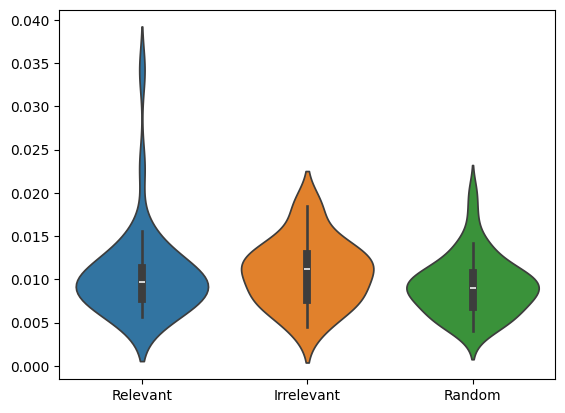

In [16]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sgd_5000_60_40, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sgd_5000_60_40, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)

### SGD; N = 5000, p = 600, d = 400

In [17]:
data, info = get_files(5000, 600, 400)
data, relevant_nodes, irrelevant_nodes, random_nodes = reorder_data(data, info)
X_train, y_train, X_valid, y_valid, X_test, y_test, cat_idxs, cat_dims = preprocess(data)
clf = generate_classifier(cat_idxs, cat_dims, optimizer = sgd)
clf_sgd_5000_600_400 = train(clf, X_train, y_train, X_valid, y_valid)

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.83736 | train_auc: 0.49352 | valid_auc: 0.51702 |  0:00:18s
epoch 1  | loss: 0.85573 | train_auc: 0.51647 | valid_auc: 0.51185 |  0:00:36s
epoch 2  | loss: 0.83294 | train_auc: 0.50797 | valid_auc: 0.51619 |  0:00:54s
epoch 3  | loss: 0.84269 | train_auc: 0.50753 | valid_auc: 0.49799 |  0:01:12s
epoch 4  | loss: 0.8268  | train_auc: 0.497   | valid_auc: 0.51659 |  0:01:30s
epoch 5  | loss: 0.84661 | train_auc: 0.51059 | valid_auc: 0.51664 |  0:01:48s
epoch 6  | loss: 0.84036 | train_auc: 0.51079 | valid_auc: 0.52    |  0:02:07s
epoch 7  | loss: 0.81336 | train_auc: 0.50063 | valid_auc: 0.50204 |  0:02:25s
epoch 8  | loss: 0.83529 | train_auc: 0.49586 | valid_auc: 0.51891 |  0:02:43s
epoch 9  | loss: 0.8336  | train_auc: 0.51684 | valid_auc: 0.53862 |  0:03:01s
epoch 10 | loss: 0.81885 | train_auc: 0.50827 | valid_auc: 0.55573 |  0:03:19s
epoch 11 | loss: 0.8295  | train_auc: 0.52989 | valid_auc: 0.55385 |  0:03:38s
epoch 12 | loss: 0.82391 | train_auc: 0.51554 | vali

C:\Users\hberg\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Average relevant feature importance: 0.000913121372271058
Average irrelevant feature importance: 0.001082190904831772
Average random feature importance: 0.0009643765601261805
Train AUC score: 0.6508055333182595
Validation AUC score: 0.7113988095238095
Test AUC score: 0.6621923262548263
False negative rate for relevant features: 0.47761194029850745
False positive rate for irrelevant features: 0.5251256281407035
False positive rate for random features: 0.4625


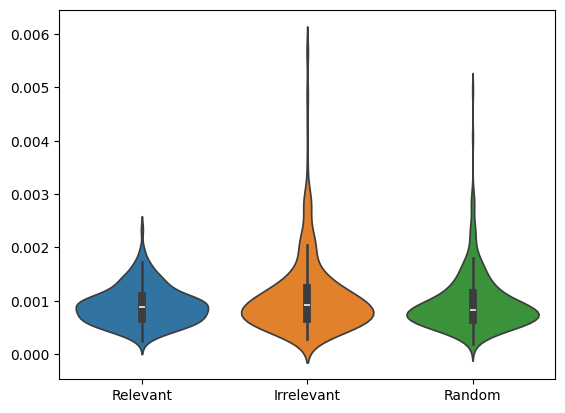

In [18]:
feature_importances, relevant, irrelevant, random, violin_plot = compute_importance(clf_sgd_5000_600_400, relevant_nodes, irrelevant_nodes, random_nodes)
print("Average relevant feature importance:", np.mean(relevant))
print("Average irrelevant feature importance:", np.mean(irrelevant))
print("Average random feature importance:", np.mean(random))

train_auc, valid_auc, test_auc = compute_auc(clf_sgd_5000_600_400, X_train, y_train, X_valid, y_valid, X_test, y_test)
print("Train AUC score:", train_auc)
print("Validation AUC score:", valid_auc)
print("Test AUC score:", test_auc)

fn_relevant, fp_irrelevant, fp_random = false_rates(feature_importances, relevant, irrelevant, random)
print("False negative rate for relevant features:", fn_relevant)
print("False positive rate for irrelevant features:", fp_irrelevant)
print("False positive rate for random features:", fp_random)